How to turn this notebook into slides? Run:
```
$ ipython nbconvert --to slides lecture.ipynb --post serve
```
then access
```
http://127.0.0.1:8000/lecture.slides.html?theme=white
```
in your browser.

# Today we're going to learn about

* Replication and reproducibility and [http://git-scm.com](git) and [http://github.com](GitHub)
* Plotting in Python using `matplotlib` (http://matplotlib.org)

# git, github, etc... Why do we care?

**Replication** and **reproducibility** are two of the cornerstones in the scientific method. With respect to data analysis (and scientific computing in general!), these concepts have the following practical implications:

* **Replication**: An author of a scientific paper that involves some data analysis should be able to rerun the analysis code and replicate the results upon request. Other scientists should be able to perform the same analysis and obtain the same results, given the information about the methods used in a publication.

* **Reproducibility**: The results obtained by analyzing the data should be reproducible with an independent implementation of the method, or using a different method altogether.


In summary: A sound scientific result should be reproducible, and a sound scientific study should be replicable.

To achieve these goals, we need to:

* Keep and take note of *exactly* which source code and version that was used to produce data and figures in published papers.

* Record information of which version of external software that was used. Keep access to the environment that was used.

* Make sure that old codes and notes are backed up and kept for future reference.

* Ideally codes should be published online, to make it easier for other scientists interested in the codes to access it.

Ensuring replicability and reproducibility of data analyses is a *difficult and complex problem*. In general, full end-to-end reproducibility is very difficult to attain.

However, there are tools that can help get us very close:

* Version Control System systems (VCSs):
    * Good choices include:
        * **git - [http://git-scm.com](http://git-scm.com)**
        * mercurial - http://mercurial.selenic.com. Also known as `hg`.
        * ***DO NOT USE: rcs, cvs, svn, perforce, ... Considered harmful!***


* Online repositories for source code. Available as both private and public repositories. 
    * Some good choices are:
        * **GitHub - [http://www.github.com](http://www.github.com)**
        * GitLab - [https://about.gitlab.com/]
        * Bitbucket - [http://www.bitbucket.com](http://www.bitbucket.com)

# Learning git+github: your task for next week

An excellent list of tutorials and pointers can be found at:

https://help.github.com/articles/good-resources-for-learning-git-and-github/

Git is a very versatile and powerfull tool; you don't need to know all of it. For the beginning, concentrate on:

* Learning how to make commits
* Learning how to branch and merge
* Learning about pull requests on github

# GitHub Student Developer Pack

<center>https://education.github.com/pack</center>
<img src="images/gh-pack-2016.jpg" width="600">

#### Note
	
Repositories are also excellent for version controlling manuscripts, figures, thesis files, data files, lab logs, etc. Basically for any digital content that must be preserved and is frequently updated.

Both public and private repositories are readily available.

They are also excellent collaboration tools!

### Finding out more

 * [Google](http://google.com)
 * [YouTube](http://youtube.com)
    * [Scott Chacon on git](https://www.youtube.com/watch?v=ZDR433b0HJY)
   
   
 * [gitref.org](http://gitref.org/index.html)
 * [LSST's page on git](https://confluence.lsstcorp.org/display/LDMDG/Using+Git+for+LSST+Development)


 * [git website](http://git-scm.com)
 * [github.com](http://github.com)


 * [Reproducible Research in Computational Science](http://dx.doi.org/10.1126/science.1213847), Roger D. Peng, Science 334, 1226 (2011).
 * [Shining Light into Black Boxes](http://dx.doi.org/10.1126/science.1218263), A. Morin et al., Science 336, 159-160 (2012).
 * [The case for open computer programs](http://dx.doi.org/doi:10.1038/nature10836), D.C. Ince, Nature 482, 485 (2012).

# matplotlib - Plotting in Python

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.

%matplotlib inline

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

To begin using Matplotlib in a Python program or a notebook, import the `matplotlib` and `pyplot` modules:

In [2]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

Do **NOT** do this:
```python
from pylab import *
```
It's considered bad practice to indiscriminantly import all the symbols (functions, variables, etc.) from a module into the current namespace. While it saves you a tiny bit of typing, it can lead to bugs and difficult-to-trace behaviors later on.

Also, `pylab` is an older (now deprecated) way to do things that may go away in a future version.

## A simple plot

Let's create a basic line plot

In [3]:
x = np.linspace(0, 5, 10)
y = x ** 2

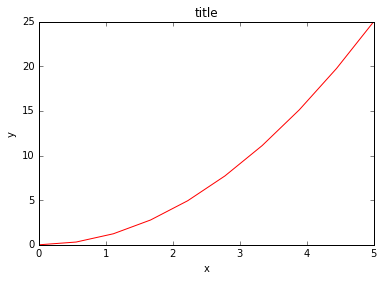

In [4]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')

Note how we've composed this plot, by calling one function after another with the figure we're plotting to being implicit (i.e., "the one we created most recently").

This is sometimes referred to as the "MATLAB-style API" in matplotlib (because this is the way Matlab does it).

Another example:

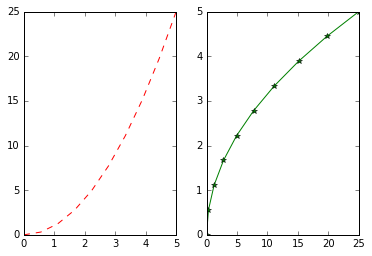

In [5]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minimum of coding overhead for simple plots. 

But don't use the MATLAB-style API for anything but the simplest figures. Instead, use matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API).

The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

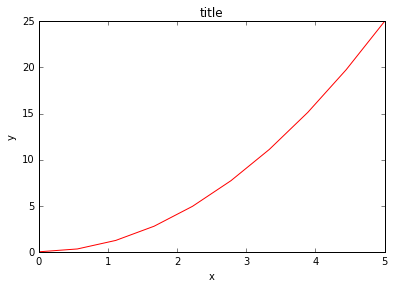

In [6]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

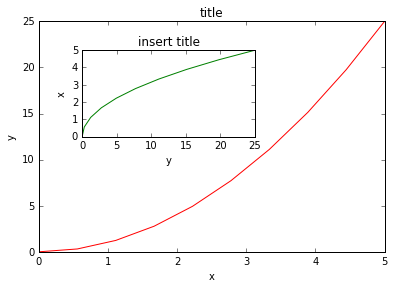

In [7]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib.

A good one is `subplots`, which can be used like this:

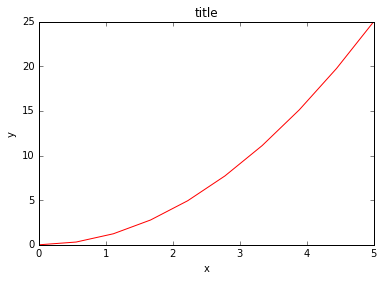

In [8]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

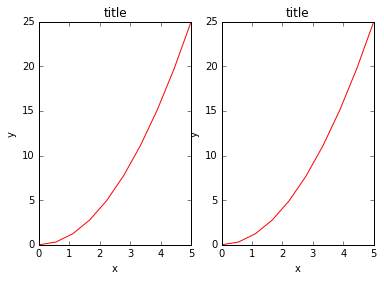

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

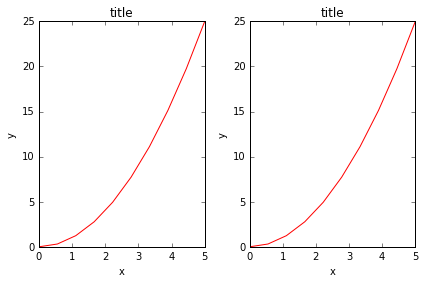

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [11]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

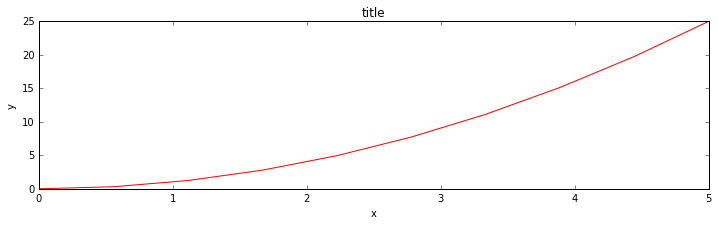

In [12]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [13]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [14]:
fig.savefig("filename.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command).

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [15]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [16]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [17]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and inflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

In [18]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

In [19]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure shows how to use the figure title, axis labels and legends described above:

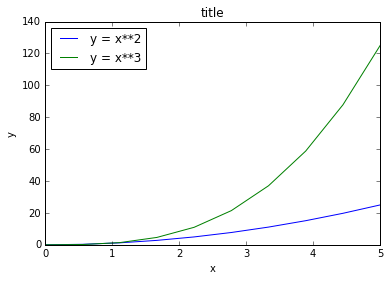

In [20]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

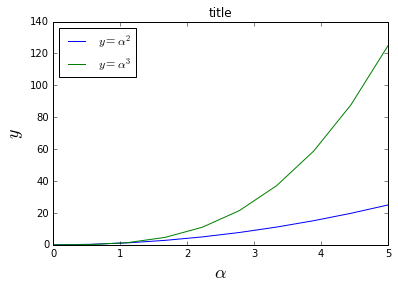

In [21]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [22]:
# Update the matplotlib configuration parameters:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 18, 'font.family': 'serif'})

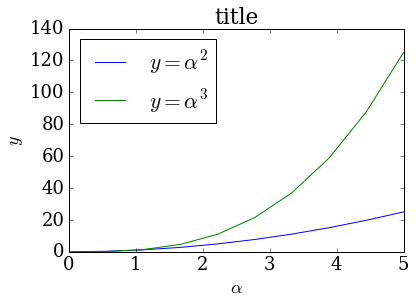

In [23]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

A good choice of global fonts are the STIX fonts: 

In [24]:
# Update the matplotlib configuration parameters:
mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

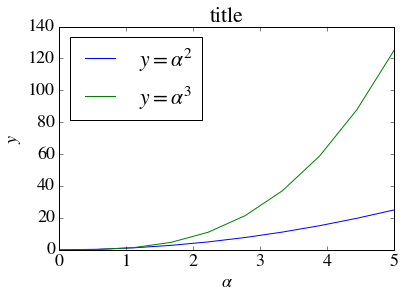

In [25]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

Or, alternatively, we can request that matplotlib uses LaTeX to render the text elements in the figure:

In [26]:
mpl.rcParams.update({'font.size': 18, 'text.usetex': True})

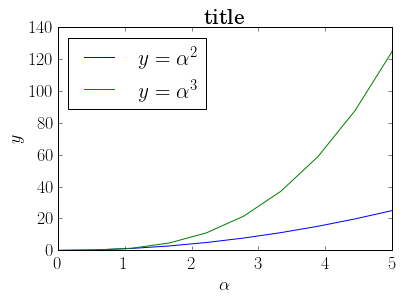

In [27]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [28]:
# restore
mpl.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [29]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

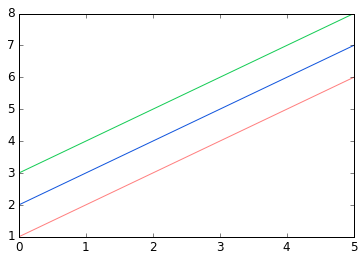

In [30]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

In [31]:
def markerdemo():
    fig, ax = plt.subplots(figsize=(12,6))

    ax.plot(x, x+1, color="blue", linewidth=0.25)
    ax.plot(x, x+2, color="blue", linewidth=0.50)
    ax.plot(x, x+3, color="blue", linewidth=1.00)
    ax.plot(x, x+4, color="blue", linewidth=2.00)

    # possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
    ax.plot(x, x+5, color="red", lw=2, linestyle='-')
    ax.plot(x, x+6, color="red", lw=2, ls='-.')
    ax.plot(x, x+7, color="red", lw=2, ls=':')

    # custom dash
    line, = ax.plot(x, x+8, color="black", lw=1.50)
    line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

    # possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
    ax.plot(x, x+ 9, color="green", lw=2, ls='-', marker='+')
    ax.plot(x, x+10, color="green", lw=2, ls='-', marker='o')
    ax.plot(x, x+11, color="green", lw=2, ls='-', marker='s')
    ax.plot(x, x+12, color="green", lw=2, ls='-', marker='1')

    # marker size and color
    ax.plot(x, x+13, color="purple", lw=1, ls='--', marker='o', markersize=2)
    ax.plot(x, x+14, color="purple", lw=1, ls='--', marker='o', markersize=4)
    ax.plot(x, x+15, color="purple", lw=1, ls='--', marker='o', markersize=8, markerfacecolor="red")
    ax.plot(x, x+16, color="purple", lw=1, ls='--', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

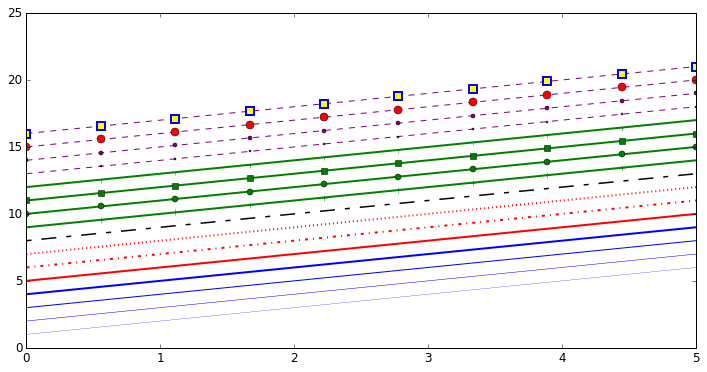

In [32]:
markerdemo()

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set separately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

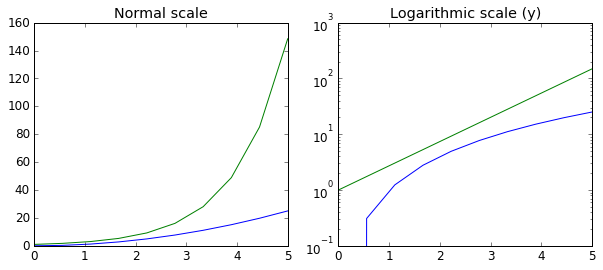

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

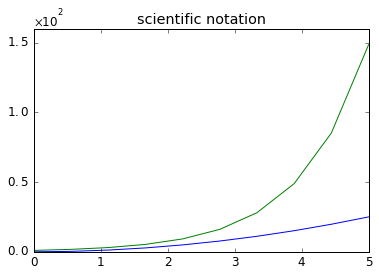

In [34]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Axis number and axis label spacing

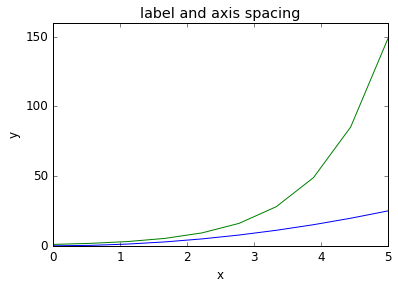

In [35]:
# distance between x and y axis and the numbers on the axes
mpl.rcParams['xtick.major.pad'] = 5
mpl.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [36]:
# restore defaults
mpl.rcParams['xtick.major.pad'] = 3
mpl.rcParams['ytick.major.pad'] = 3

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

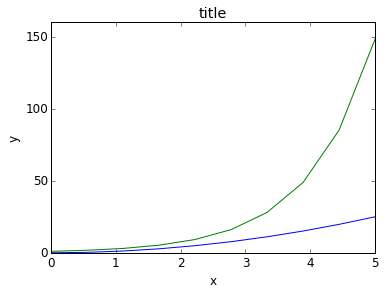

In [37]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

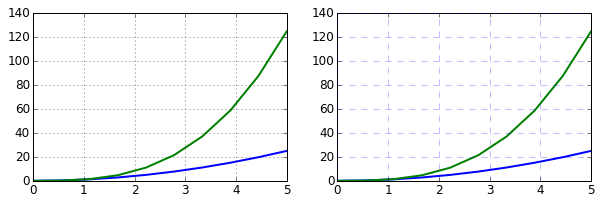

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [39]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

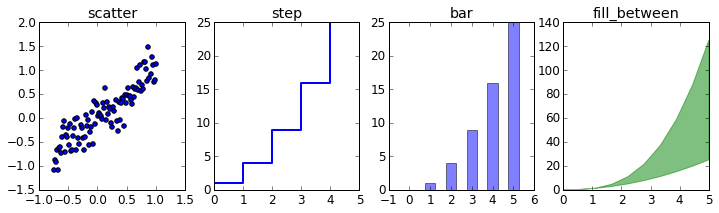

In [40]:
import numpy.random as rnd

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*rnd.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

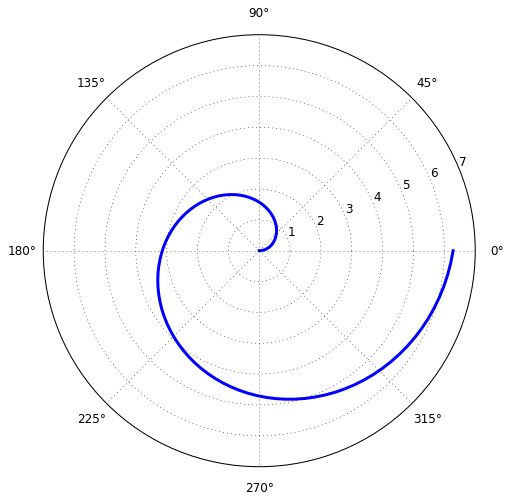

In [41]:
# polar plot using add_axes and polar projection
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

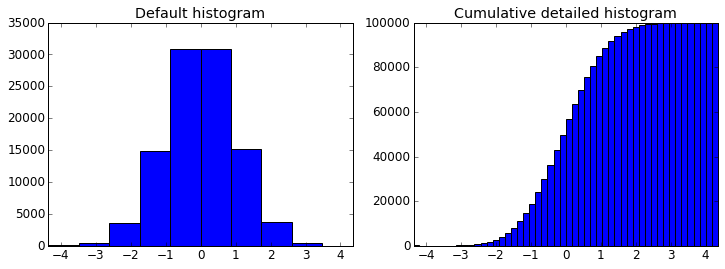

In [42]:
# A histogram
n = rnd.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

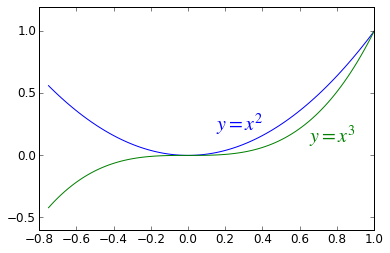

In [43]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

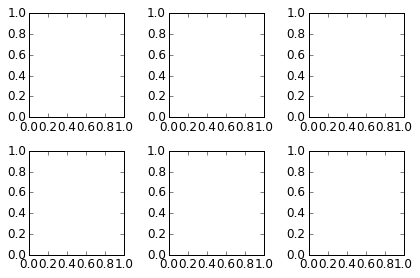

In [44]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

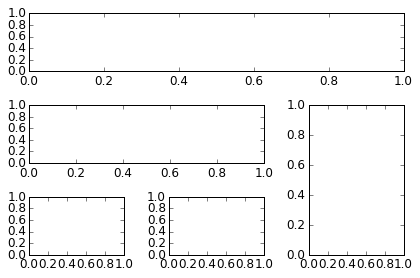

In [45]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

### Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [46]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [47]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

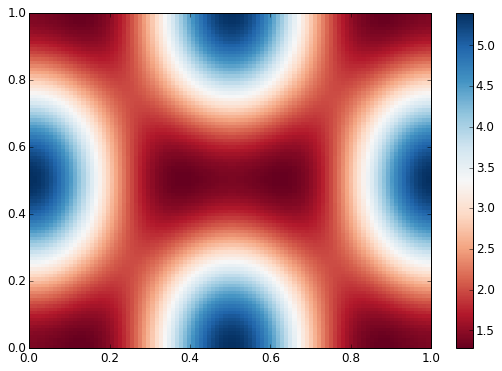

In [48]:
fig, ax = plt.subplots(figsize=(9, 6))

p = ax.pcolor(X/(2.*np.pi), Y/(2.*np.pi), Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

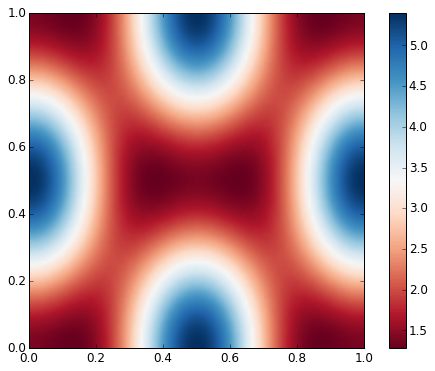

In [49]:
fig, ax = plt.subplots(figsize=(9,6))

im = ax.imshow(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

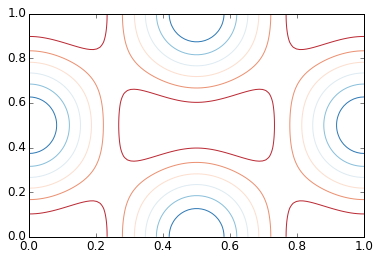

In [50]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

# Styles

Default matplotlib style is not generally recognized for its beauty. It will be changed in `matplotlib` 2.0, coming later this year.

However, alternative styles are available and can be used.

In [51]:
def demo_plot():
    fig = plt.figure(figsize=(12, 8))

    axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    axes2 = fig.add_axes([0.15, 0.5, 0.4, 0.3]) # inset axes

    # main figure
    axes1.plot(x, y, 'r')
    axes1.set_xlabel('x')
    axes1.set_ylabel('y')
    axes1.set_title('title')

    # insert
    axes2.plot(y, x, 'g')
    axes2.set_xlabel('y')
    axes2.set_ylabel('x')
    axes2.set_title('insert title');

# A figure with the default style

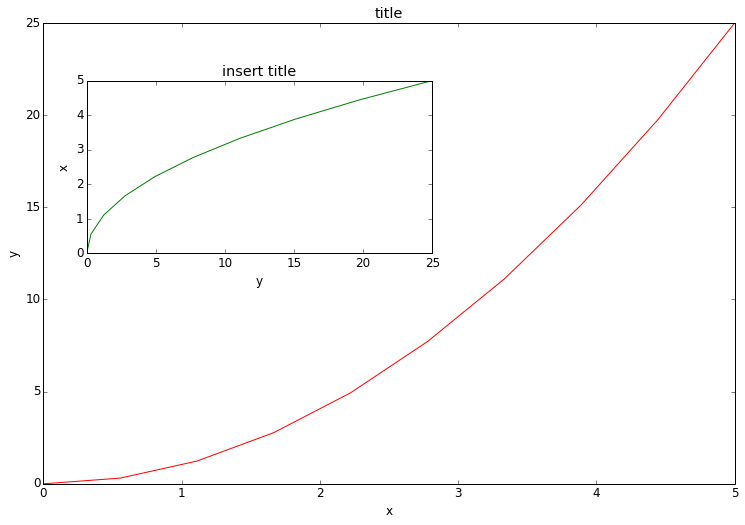

In [52]:
demo_plot()

# A figure using a style from Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Its styles have been added to Matplotlib 1.5.

Look here for more on Seaborn: http://stanford.edu/~mwaskom/software/seaborn/

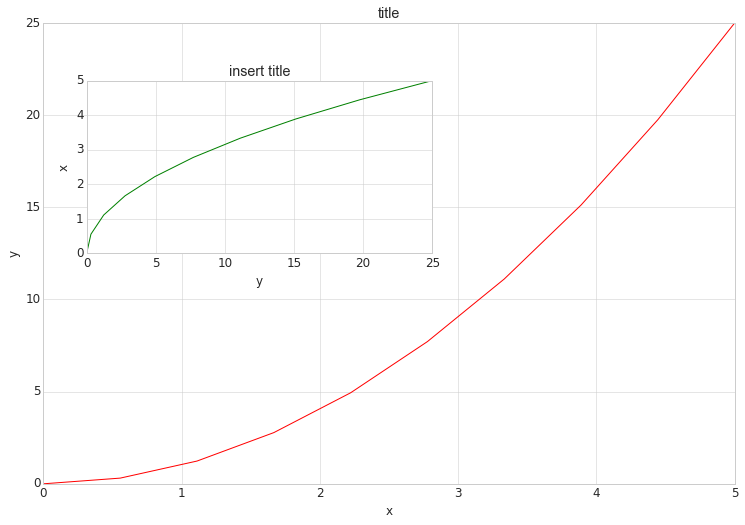

In [53]:
plt.style.use('seaborn-whitegrid')
demo_plot()

# Going back to the default style

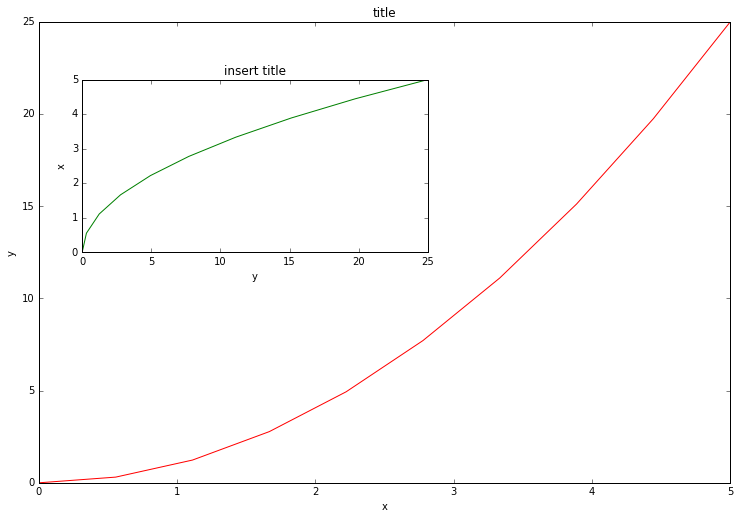

In [54]:
def reset_style():
    mpl.rcParams.update(mpl.rcParamsDefault)
    %matplotlib inline

reset_style()
demo_plot()

# Which styles are available?

In [55]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

# Another attractive style: ggplot

`ggplot` style will look familiar to users of R (and the readers of [The New York Times](http://blog.pivotal.io/wp-content/uploads/2013/05/nyt_dem_rep.png)).

In [56]:
def demo_plot2():
    mpl.rcParams.update({'font.size': 10, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

    n = np.array([0,1,2,3,4,5])
    xx = np.linspace(-0.75, 1., 100)

    fig, axes = plt.subplots(2, 2, figsize=(12,10))

    axes[0, 0].scatter(xx, xx + 0.25*rnd.randn(len(xx)))
    axes[0, 0].set_title("scatter")

    axes[0, 1].step(n, n**2, lw=2)
    axes[0, 1].set_title("step")

    axes[1, 0].bar(n, n**2, align="center", width=0.5, alpha=0.5)
    axes[1, 0].set_title("bar")

    axes[1, 1].fill_between(x, x**2, x**3, color="green", alpha=0.5);
    axes[1, 1].set_title("fill between");

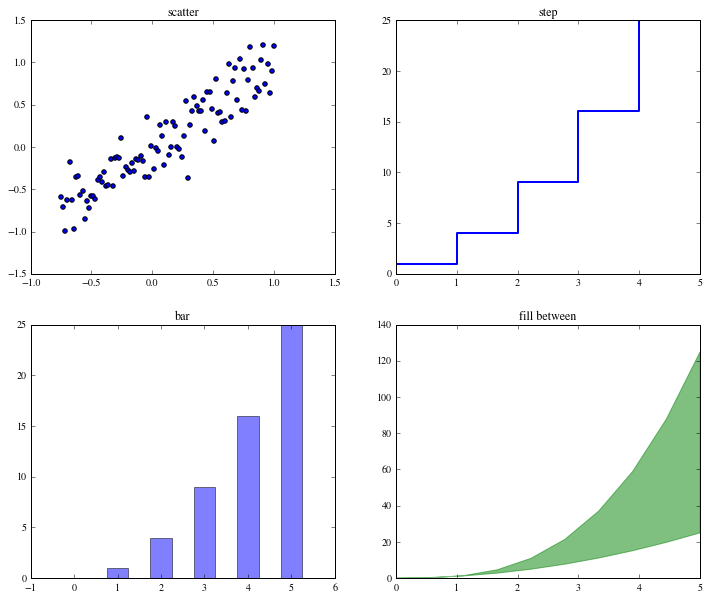

In [57]:
reset_style()
demo_plot2()

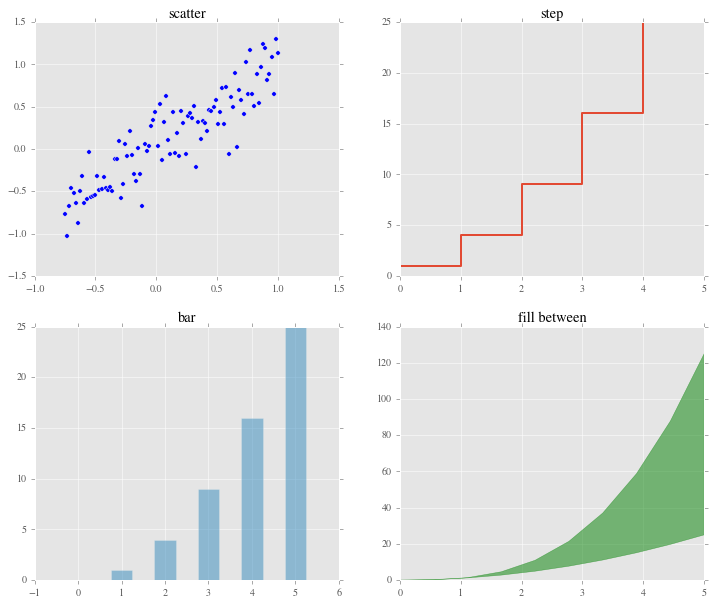

In [58]:
reset_style()
plt.style.use('ggplot')
demo_plot2()

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcasing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
